#### Singapore MRT stations

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Question 2a
Scrape and analyze the list of operational Singapore MRT stations from the URL:

In [2]:
# Scraping data
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_Singapore_MRT_stations'
dfs = pd.read_html(url)
print(len(dfs))

20


In [3]:
# Selecting Required Dataset
df= dfs[2]

In [4]:
df.columns

MultiIndex([(              'Alpha-numeric code(s)', ...),
            (                       'Station name', ...),
            (                       'Station name', ...),
            (                       'Station name', ...),
            (                            'Opening', ...),
            (     'Name(s) during planning stages', ...),
            (                       'Abbreviation', ...),
            (                        'Location(s)', ...),
            ('Interchange;Adjacent transportation', ...)],
           )

#### Data Cleaning

In [5]:
df.columns = ['_'.join(col) for col in df.columns]

In [6]:
df

,Alpha-numeric code(s)_In operation,Station name_English • Malay,Station name_Chinese,Station name_Tamil,Opening_Opening,Name(s) during planning stages_Name(s) during planning stages,Abbreviation_Abbreviation,Location(s)_Location(s),Interchange;Adjacent transportation_Interchange;Adjacent transportation
0,North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL)
1,NS1 EW24,Jurong East,裕廊东,ஜூரோங் கிழக்கு,10 March 1990,Jurong East,JUR,Jurong East,East West Line — Jurong East
2,NS2,Bukit Batok,武吉巴督,புக்கிட் பாத்தோக்,10 March 1990,Bukit Batok South,BBT,Bukit Batok,Bukit Batok
3,NS3,Bukit Gombak,武吉甘柏,புக்கிட் கோம்பாக்,10 March 1990,Bukit Batok North,BGB,Bukit Batok,—
4,—,Brickland,红砖,பிரிக்லேன்ட்,Mid-2030s,Brickland,TBA,Exact location not yet known,—
...,...,...,...,...,...,...,...,...,...
255,—,Jurong Lake District,裕廊湖区,ஜூரோங் லேக் வட்­டா­ரம்,2032,Jurong Lake District,JLD,Jurong East,—
256,Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe)
257,—,Elias,伊莱雅,இலியாஸ்,2032,Elias,PRL,Pasir Ris,—
258,PE4,Riviera,里维拉,ரிவியாரா,2032,Riviera,RIV,Punggol,PGLRT East Loop


In [7]:
# Removing Unnecessary Columns
col=['Station name_Chinese','Station name_Tamil','Station name_Tamil','Name(s) during planning stages_Name(s) during planning stages','Interchange;Adjacent transportation_Interchange;Adjacent transportation']
df.drop(col,axis=1,inplace=True)

In [8]:
df

,Alpha-numeric code(s)_In operation,Station name_English • Malay,Opening_Opening,Abbreviation_Abbreviation,Location(s)_Location(s)
0,North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL)
1,NS1 EW24,Jurong East,10 March 1990,JUR,Jurong East
2,NS2,Bukit Batok,10 March 1990,BBT,Bukit Batok
3,NS3,Bukit Gombak,10 March 1990,BGB,Bukit Batok
4,—,Brickland,Mid-2030s,TBA,Exact location not yet known
...,...,...,...,...,...
255,—,Jurong Lake District,2032,JLD,Jurong East
256,Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe)
257,—,Elias,2032,PRL,Pasir Ris
258,PE4,Riviera,2032,RIV,Punggol


In [9]:
# Renaming columns
df.rename(columns={'Alpha-numeric code(s)_In operation': 'alpha_numeric_codes', 'Station name_English • Malay': 'name','Opening_Opening':'opening','Abbreviation_Abbreviation':'abbreviation','Interchange;Adjacent transportation_Interchange;Adjacent transportation':'mrt_line' }, inplace=True)

In [10]:
df.shape

(260, 5)

In [11]:
df

,alpha_numeric_codes,name,opening,abbreviation,Location(s)_Location(s)
0,North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL),North South Line (NSL)
1,NS1 EW24,Jurong East,10 March 1990,JUR,Jurong East
2,NS2,Bukit Batok,10 March 1990,BBT,Bukit Batok
3,NS3,Bukit Gombak,10 March 1990,BGB,Bukit Batok
4,—,Brickland,Mid-2030s,TBA,Exact location not yet known
...,...,...,...,...,...
255,—,Jurong Lake District,2032,JLD,Jurong East
256,Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe),Punggol Extension (CRLe)
257,—,Elias,2032,PRL,Pasir Ris
258,PE4,Riviera,2032,RIV,Punggol


In [12]:
# Removing Rows where all columns contains same values
df = df[df['opening'] != df['abbreviation']]

In [13]:
df.shape

(234, 5)

In [14]:
# Rmoving non operational stations
df= df[df['opening'] != 'TBA']

In [15]:
# Rmoving 'TBA'  data from abbreviation column
df= df[df['abbreviation'] != 'TBA']

In [16]:
df.shape

(226, 5)

In [17]:
df.head()

,alpha_numeric_codes,name,opening,abbreviation,Location(s)_Location(s)
1,NS1 EW24,Jurong East,10 March 1990,JUR,Jurong East
2,NS2,Bukit Batok,10 March 1990,BBT,Bukit Batok
3,NS3,Bukit Gombak,10 March 1990,BGB,Bukit Batok
5,NS4 BP1,Choa Chu Kang,10 March 1990,CCK,Choa Chu Kang
6,NS5,Yew Tee,10 February 1996,YWT,Choa Chu Kang


In [18]:
df.drop(df.index[df['alpha_numeric_codes'] == '—'], inplace=True)

In [19]:
df.shape

(176, 5)

In [20]:
# Funcation that is use to create 'mrt_line' line column acoording to its alpha_numeric_codes
def label_race (row):
    if row['alpha_numeric_codes'].startswith('NS'):
        return 'NSL'
    if row['alpha_numeric_codes'].startswith('EW'):
        return 'EWL'
    if row['alpha_numeric_codes'].startswith('CG'):
        return 'CAL'
    if row['alpha_numeric_codes'].startswith('NE'):
        return 'NEL'
    if row['alpha_numeric_codes'].startswith('CC'):
        return 'CCL'
    if row['alpha_numeric_codes'].startswith('CL'):
        return 'CCLe'
    if row['alpha_numeric_codes'].startswith('DT'):
        return 'DTL'
    if row['alpha_numeric_codes'].startswith('TE'):
        return 'TEL'
    if row['alpha_numeric_codes'].startswith('PE'):
        return 'LRT'
    return 'Other'

In [21]:
# Creating 'mrt_line' column 
df['mrt_line'] = df.apply (lambda row: label_race(row), axis=1)

In [22]:
df

,alpha_numeric_codes,name,opening,abbreviation,Location(s)_Location(s),mrt_line
1,NS1 EW24,Jurong East,10 March 1990,JUR,Jurong East,NSL
2,NS2,Bukit Batok,10 March 1990,BBT,Bukit Batok,NSL
3,NS3,Bukit Gombak,10 March 1990,BGB,Bukit Batok,NSL
5,NS4 BP1,Choa Chu Kang,10 March 1990,CCK,Choa Chu Kang,NSL
6,NS5,Yew Tee,10 February 1996,YWT,Choa Chu Kang,NSL
...,...,...,...,...,...,...
248,TE7,Bright Hill,2030,BRH,Bishan,TEL
251,DT6,King Albert Park,2032,KAP,Bukit Timah,DTL
253,EW23,Clementi,2032,CLE,Clementi,EWL
258,PE4,Riviera,2032,RIV,Punggol,LRT


In [23]:
df.columns

Index(['alpha_numeric_codes', 'name', 'opening', 'abbreviation',
       'Location(s)_Location(s)', 'mrt_line'],
      dtype='object')

#### Data Visualization

<AxesSubplot:>

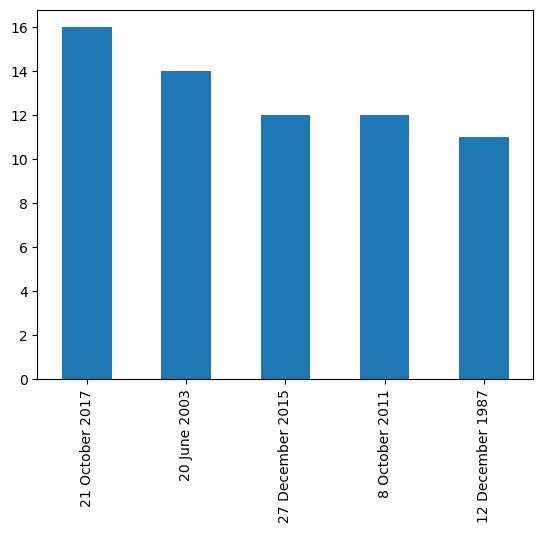

In [24]:
df.opening.value_counts().head().plot(kind='bar')

<AxesSubplot:>

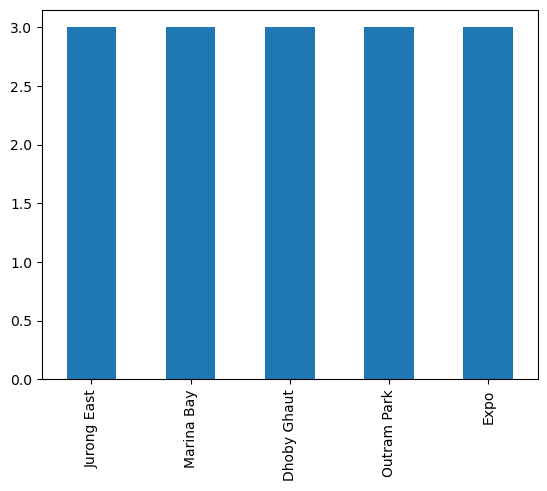

In [25]:
df.name.value_counts().head().plot(kind='bar')

### Question 2b
On a SINGLE diagram, design and visualize the number of MRT stations per MRT
line.

Text(0, 0.5, 'MRT stations')

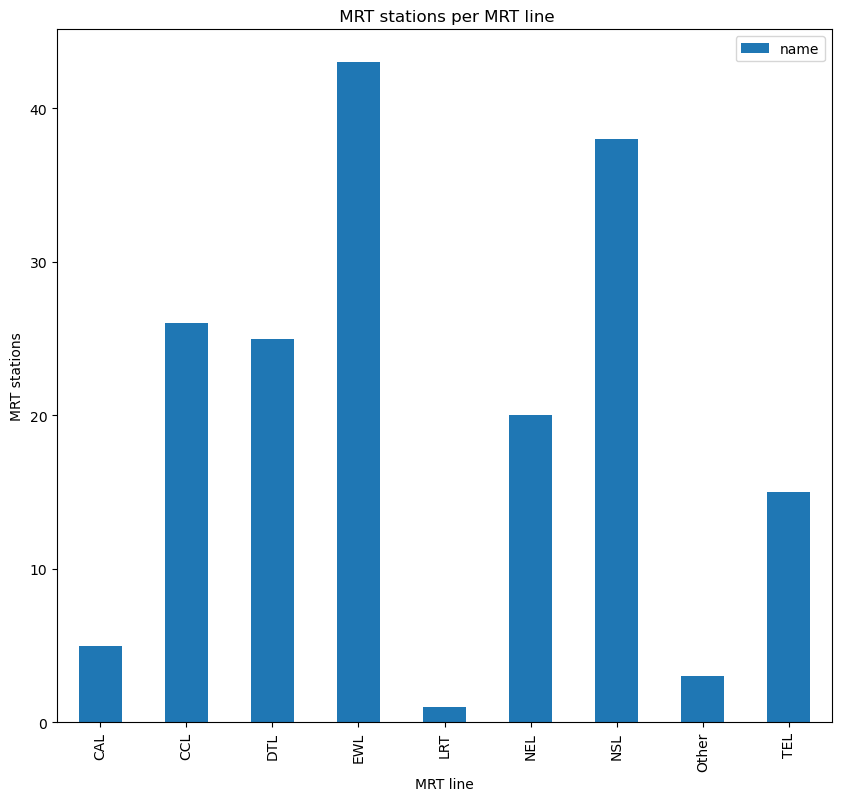

In [26]:
plt.rcParams['figure.figsize'] = [10, 9]
ax = df.groupby('mrt_line')[['name']].count().plot(kind='bar')
plt.title(' MRT stations per MRT line')
plt.xlabel('MRT line')
plt.ylabel('MRT stations')

# Part Q2 C

In [27]:
df

,alpha_numeric_codes,name,opening,abbreviation,Location(s)_Location(s),mrt_line
1,NS1 EW24,Jurong East,10 March 1990,JUR,Jurong East,NSL
2,NS2,Bukit Batok,10 March 1990,BBT,Bukit Batok,NSL
3,NS3,Bukit Gombak,10 March 1990,BGB,Bukit Batok,NSL
5,NS4 BP1,Choa Chu Kang,10 March 1990,CCK,Choa Chu Kang,NSL
6,NS5,Yew Tee,10 February 1996,YWT,Choa Chu Kang,NSL
...,...,...,...,...,...,...
248,TE7,Bright Hill,2030,BRH,Bishan,TEL
251,DT6,King Albert Park,2032,KAP,Bukit Timah,DTL
253,EW23,Clementi,2032,CLE,Clementi,EWL
258,PE4,Riviera,2032,RIV,Punggol,LRT


In [28]:
df = df.reset_index()

In [29]:
df

,index,alpha_numeric_codes,name,opening,abbreviation,Location(s)_Location(s),mrt_line
0,1,NS1 EW24,Jurong East,10 March 1990,JUR,Jurong East,NSL
1,2,NS2,Bukit Batok,10 March 1990,BBT,Bukit Batok,NSL
2,3,NS3,Bukit Gombak,10 March 1990,BGB,Bukit Batok,NSL
3,5,NS4 BP1,Choa Chu Kang,10 March 1990,CCK,Choa Chu Kang,NSL
4,6,NS5,Yew Tee,10 February 1996,YWT,Choa Chu Kang,NSL
...,...,...,...,...,...,...,...
171,248,TE7,Bright Hill,2030,BRH,Bishan,TEL
172,251,DT6,King Albert Park,2032,KAP,Bukit Timah,DTL
173,253,EW23,Clementi,2032,CLE,Clementi,EWL
174,258,PE4,Riviera,2032,RIV,Punggol,LRT


In [30]:
df=df.drop(columns=['index'],axis=1)

In [31]:
df.drop(columns=['Location(s)_Location(s)'],axis=1,inplace = True)

In [32]:
df

,alpha_numeric_codes,name,opening,abbreviation,mrt_line
0,NS1 EW24,Jurong East,10 March 1990,JUR,NSL
1,NS2,Bukit Batok,10 March 1990,BBT,NSL
2,NS3,Bukit Gombak,10 March 1990,BGB,NSL
3,NS4 BP1,Choa Chu Kang,10 March 1990,CCK,NSL
4,NS5,Yew Tee,10 February 1996,YWT,NSL
...,...,...,...,...,...
171,TE7,Bright Hill,2030,BRH,TEL
172,DT6,King Albert Park,2032,KAP,DTL
173,EW23,Clementi,2032,CLE,EWL
174,PE4,Riviera,2032,RIV,LRT


In [33]:
new_df = df[['alpha_numeric_codes','name','abbreviation','mrt_line']]

new_df

,alpha_numeric_codes,name,abbreviation,mrt_line
0,NS1 EW24,Jurong East,JUR,NSL
1,NS2,Bukit Batok,BBT,NSL
2,NS3,Bukit Gombak,BGB,NSL
3,NS4 BP1,Choa Chu Kang,CCK,NSL
4,NS5,Yew Tee,YWT,NSL
...,...,...,...,...
171,TE7,Bright Hill,BRH,TEL
172,DT6,King Albert Park,KAP,DTL
173,EW23,Clementi,CLE,EWL
174,PE4,Riviera,RIV,LRT


In [34]:
# North South Line = 28 Stations
NS = pd.DataFrame(columns= new_df.columns)

for i in range(27):
    NS = pd.concat([NS, pd.DataFrame.from_records([new_df.loc[i]])])
        
# East West Line = 33
EWL = pd.DataFrame(columns= new_df.columns)

for i in range(i+1,i + 34):
    EWL = pd.concat([EWL, pd.DataFrame.from_records([new_df.loc[i]])])
        
# Changi Airport Line= 2
CAL = pd.DataFrame(columns= new_df.columns)

for i in range(i+1,i + 3):
    CAL = pd.concat([CAL, pd.DataFrame.from_records([new_df.loc[i]])])     

# North East Line= 17
NEL = pd.DataFrame(columns= new_df.columns)

for i in range(i+1,i + 17):
    NEL = pd.concat([NEL, pd.DataFrame.from_records([new_df.loc[i]])])
    
# Circle Line= 29
CCL = pd.DataFrame(columns= new_df.columns)

for i in range(i+1,i + 29):
    CCL = pd.concat([CCL, pd.DataFrame.from_records([new_df.loc[i]])])
    
# Downtown Line = 35
DDL = pd.DataFrame(columns= new_df.columns)
for i in range(i+3,i + 37):
    DDL = pd.concat([DDL, pd.DataFrame.from_records([new_df.loc[i]])])
    
# Thomson–East Coast Line = 9
TEL = pd.DataFrame(columns= new_df.columns)
for i in range(i+1,i + 10):
    TEL = pd.concat([TEL, pd.DataFrame.from_records([new_df.loc[i]])])

In [35]:
ls = [i for i in range(27)]
NS['index'] = ls
NS.set_index('index',inplace=True)

ls = [i for i in range(33)]
EWL['index'] = ls
EWL.set_index('index',inplace=True)

ls = [i for i in range(2)]
CAL['index'] = ls
CAL.set_index('index',inplace=True)

ls = [i for i in range(16)]
NEL['index'] = ls
NEL.set_index('index',inplace=True)

ls = [i for i in range(28)]
CCL['index'] = ls
CCL.set_index('index',inplace=True)

ls = [i for i in range(34)]
DDL['index'] = ls
DDL.set_index('index',inplace=True)

ls = [i for i in range(9)]
TEL['index'] = ls
TEL.set_index('index',inplace=True)

In [36]:
From = []
To = []
MRT = []

# NS
for i, row in NS.iterrows():
    for j , row in NS.iterrows():
        if j+1 < 27:
            d1 = NS.loc[i]['alpha_numeric_codes']
            d2 = NS.loc[j+1]['alpha_numeric_codes']
            d1 = d1.split(' ',1)[0][2:4]
            d2 = d2.split(' ',1)[0][2:4]
            d = int(d2) - int(d1)
            
            if d == 1:
                From.append(NS.loc[i]['name'])
                To.append(NS.loc[j+1]['name'])
                MRT.append(NS.loc[j+1]['mrt_line'])

records = pd.DataFrame(columns=['from','to','mrt_line'])
records['from'] = From
records['to'] = To
records['mrt_line'] = MRT

# EWL
for i, row in EWL.iterrows():
    for j , row in EWL.iterrows():
        if j+1 < 33:
            d1 = EWL.loc[i]['alpha_numeric_codes']
            d2 = EWL.loc[j+1]['alpha_numeric_codes']
            d1 = d1.split(' ',1)[0][2:4]
            d2 = d2.split(' ',1)[0][2:4]
            d = int(d2) - int(d1)
            
            if d == 1:
                From.append(EWL.loc[i]['name'])
                To.append(EWL.loc[j+1]['name'])
                MRT.append(EWL.loc[j+1]['mrt_line'])

# CAL
for i, row in CAL.iterrows():
    for j , row in CAL.iterrows():
        if j+1 < 2:
            d1 = CAL.loc[i]['alpha_numeric_codes']
            d2 = CAL.loc[j+1]['alpha_numeric_codes']
            d1 = d1.split(' ',1)[0][2:4]
            d2 = d2.split(' ',1)[0][2:4]
            d = int(d2) - int(d1)
            
            if d == 1:
                From.append(CAL.loc[i]['name'])
                To.append(CAL.loc[j+1]['name'])
                MRT.append(CAL.loc[j+1]['mrt_line'])

#NEL
for i, row in NEL.iterrows():
    for j , row in NEL.iterrows():
        if j+1 < 16:
            d1 = NEL.loc[i]['alpha_numeric_codes']
            d2 = NEL.loc[j+1]['alpha_numeric_codes']
            d1 = d1.split(' ',1)[0][2:4]
            d2 = d2.split(' ',1)[0][2:4]
            d = int(d2) - int(d1)
            
            if d == 1:
                From.append(NEL.loc[i]['name'])
                To.append(NEL.loc[j+1]['name'])
                MRT.append(NEL.loc[j+1]['mrt_line'])

# CCL
for i, row in CCL.iterrows():
    for j , row in CCL.iterrows():
        if j+1 < 28:
            d1 = CCL.loc[i]['alpha_numeric_codes']
            d2 = CCL.loc[j+1]['alpha_numeric_codes']
            d1 = d1.split(' ',1)[0][2:4]
            d2 = d2.split(' ',1)[0][2:4]
            d = int(d2) - int(d1)
            
            if d == 1:
                From.append(CCL.loc[i]['name'])
                To.append(CCL.loc[j+1]['name'])
                MRT.append(CCL.loc[j+1]['mrt_line'])

                
# DDL
for i, row in DDL.iterrows():
    for j , row in DDL.iterrows():
        if j+1 < 34:
            d1 = DDL.loc[i]['alpha_numeric_codes']
            d2 = DDL.loc[j+1]['alpha_numeric_codes']
            d1 = d1.split(' ',1)[0][2:4]
            d2 = d2.split(' ',1)[0][2:4]
            d = int(d2) - int(d1)
            
            if d == 1:
                From.append(DDL.loc[i]['name'])
                To.append(DDL.loc[j+1]['name'])
                MRT.append(DDL.loc[j+1]['mrt_line'])

# TEL
for i, row in TEL.iterrows():
    for j , row in TEL.iterrows():
        if j+1 < 8:
            d1 = TEL.loc[i]['alpha_numeric_codes']
            d2 = TEL.loc[j+1]['alpha_numeric_codes']
            d1 = d1.split(' ',1)[0][2:4]
            d2 = d2.split(' ',1)[0][2:4]
            d = int(d2) - int(d1)
            
            if d == 1:
                From.append(TEL.loc[i]['name'])
                To.append(TEL.loc[j+1]['name'])
                MRT.append(TEL.loc[j+1]['mrt_line'])

                
records = pd.DataFrame(columns=['from','to','mrt_line'])
records['from'] = From
records['to'] = To
records['mrt_line'] = MRT

In [37]:
records

,from,to,mrt_line
0,Jurong East,Bukit Batok,NSL
1,Bukit Batok,Bukit Gombak,NSL
2,Bukit Gombak,Choa Chu Kang,NSL
3,Choa Chu Kang,Yew Tee,NSL
4,Kranji,Marsiling,NSL
...,...,...,...
127,Springleaf,Lentor,TEL
128,Lentor,Mayflower,TEL
129,Mayflower,Bright Hill,TEL
130,Bright Hill,Upper Thomson,TEL


In [38]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

new_records = swap_columns(records, 'from','to')
new_records.rename(columns={'to':'from','from':'to'},inplace=True)

new_records

,from,to,mrt_line
0,Bukit Batok,Jurong East,NSL
1,Bukit Gombak,Bukit Batok,NSL
2,Choa Chu Kang,Bukit Gombak,NSL
3,Yew Tee,Choa Chu Kang,NSL
4,Marsiling,Kranji,NSL
...,...,...,...
127,Lentor,Springleaf,TEL
128,Mayflower,Lentor,TEL
129,Bright Hill,Mayflower,TEL
130,Upper Thomson,Bright Hill,TEL


In [39]:
# Final Results

records = pd.concat([records,new_records],axis=0)
records

,from,to,mrt_line
0,Jurong East,Bukit Batok,NSL
1,Bukit Batok,Bukit Gombak,NSL
2,Bukit Gombak,Choa Chu Kang,NSL
3,Choa Chu Kang,Yew Tee,NSL
4,Kranji,Marsiling,NSL
...,...,...,...
127,Lentor,Springleaf,TEL
128,Mayflower,Lentor,TEL
129,Bright Hill,Mayflower,TEL
130,Upper Thomson,Bright Hill,TEL


In [40]:
records.sort_values('mrt_line',inplace=True)
lst = [i for i in range(264)]
records['index'] = lst
records.set_index('index',inplace=True)
records

,from,to,mrt_line
index,,,
0,Expo,Changi Airport,CAL
1,Changi Airport,Expo,CAL
2,one-north,Kent Ridge,CCL
3,Bras Basah,HarbourFront,CCL
4,Telok Blangah,Labrador Park,CCL
...,...,...,...
259,Mayflower,Bright Hill,TEL
260,Bright Hill,Upper Thomson,TEL
261,Lentor,Mayflower,TEL


# Part Q2d

In [41]:
# Converting names to abbreviations
for i in range(264):
    for j in range(169):
        if df['name'][j] == records['from'][i]:
            records['from'][i] = df['abbreviation'][j]

In [42]:
for i in range(264):
    for j in range(169):
        if df['name'][j] == records['to'][i]:
            records['to'][i] = df['abbreviation'][j]

In [43]:
records

,from,to,mrt_line
index,,,
0,XPO,CGA,CAL
1,CGA,XPO,CAL
2,ONH,KRG,CCL
3,BBS,HBF,CCL
4,TLB,LBD,CCL
...,...,...,...
259,MFL,BRH,TEL
260,BRH,UTS,TEL
261,LTR,MFL,TEL


In [44]:
names = []
for i in range(264):
    names.append(records['from'][i])
    
names = list(dict.fromkeys(names))
len(names)

124

In [45]:
def get_shortest_travel_path(from_station, to_station):
    
    print(records[records['to'] == to_station],"\n",records[records['from'] == from_station])

get_shortest_travel_path('WDL','CGA')

      from   to mrt_line
index                   
0      XPO  CGA      CAL 
       from   to mrt_line
index                   
221    WDL  ADM      NSL
244    WDL  UTS      NSL
247    WDL  MSL      NSL
